In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, chi2_contingency

In [2]:
train_df = pd.read_csv("./data/train.csv")

print("Shape:", train_df.shape)
train_df

Shape: (603, 27)


,Unnamed: 0,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,GBM,TCGA-06-A6S0,Male,79 years 183 days,Glioblastoma,black or african american,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,1,LGG,TCGA-HT-8106,Male,53 years 197 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
2,2,LGG,TCGA-HT-7607,Female,61 years 305 days,"Astrocytoma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,3,LGG,TCGA-QH-A6X5,Female,58 years 55 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,4,LGG,TCGA-P5-A5F1,Male,30 years 113 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,598,GBM,TCGA-06-0744,Male,67 years,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
599,599,LGG,TCGA-DU-A6S7,Female,27 years 309 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
600,600,LGG,TCGA-DU-5853,Male,29 years 32 days,Mixed glioma,white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
601,601,LGG,TCGA-DU-A76R,Male,51 years 312 days,"Oligodendroglioma, anaplastic",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [3]:
train_df.columns.tolist()

['Unnamed: 0',
 'Grade',
 'Case_ID',
 'Gender',
 'Age_at_diagnosis',
 'Primary_Diagnosis',
 'Race',
 'IDH1',
 'TP53',
 'ATRX',
 'PTEN',
 'EGFR',
 'CIC',
 'MUC16',
 'PIK3CA',
 'NF1',
 'PIK3R1',
 'FUBP1',
 'RB1',
 'NOTCH1',
 'BCOR',
 'CSMD3',
 'SMARCA4',
 'GRIN2A',
 'IDH2',
 'FAT4',
 'PDGFRA']

In [4]:
train_df.dtypes

Unnamed: 0            int64
Grade                object
Case_ID              object
Gender               object
Age_at_diagnosis     object
Primary_Diagnosis    object
Race                 object
IDH1                 object
TP53                 object
ATRX                 object
PTEN                 object
EGFR                 object
CIC                  object
MUC16                object
PIK3CA               object
NF1                  object
PIK3R1               object
FUBP1                object
RB1                  object
NOTCH1               object
BCOR                 object
CSMD3                object
SMARCA4              object
GRIN2A               object
IDH2                 object
FAT4                 object
PDGFRA               object
dtype: object

In [5]:
missing = (
    train_df.isna()
    .sum()
    .sort_values(ascending=False)
)

missing[missing > 0]

Series([], dtype: int64)

# Base EDA and train data preparation

We got all features categorical, which are not machine interpetable from the box, most of them can be converted, so we complete let's perform some feature analysis first.

At first, we'll find out featires can be binarized by checking unique values set:

In [6]:
from preprocessing_scripts.dataset_preprocessing import print_unique_values

print_unique_values(train_df)


Column: Unnamed: 0
Number of unique values: 603
First 20 unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
... (truncated)

Column: Grade
Number of unique values: 2
Unique values: ['GBM' 'LGG']

Column: Case_ID
Number of unique values: 603
First 20 unique values: ['TCGA-06-A6S0' 'TCGA-HT-8106' 'TCGA-HT-7607' 'TCGA-QH-A6X5'
 'TCGA-P5-A5F1' 'TCGA-CS-4941' 'TCGA-87-5896' 'TCGA-76-6656'
 'TCGA-26-5136' 'TCGA-S9-A6WQ' 'TCGA-VM-A8CB' 'TCGA-32-4208'
 'TCGA-DB-A4XD' 'TCGA-76-6191' 'TCGA-12-0819' 'TCGA-HT-7692'
 'TCGA-06-6693' 'TCGA-76-6192' 'TCGA-TM-A84O' 'TCGA-RY-A845']
... (truncated)

Column: Gender
Number of unique values: 3
Unique values: ['Male' 'Female' '--']

Column: Age_at_diagnosis
Number of unique values: 595
First 20 unique values: ['79 years 183 days' '53 years 197 days' '61 years 305 days'
 '58 years 55 days' '30 years 113 days' '67 years 107 days'
 '50 years 129 days' '66 years 159 days' '78 years 7 days'
 '57 years 314 days' '33 years 287 days' '25 y

Here are what we will do with those features accordingly to analysis:

| Feature | Observations | Processing pipeline | Requires additional analysis |
|-|-|-|-|
| `Unnamed: 0` | 603 unique occurences as well as full dataset length, looks just like data item index, feature is useless for following data analysis | Remove that feature column  | - |
| `Grade` | Target column, 2 unique values, so can be binarized | Binarize feature, keep label <-> id mapping for easier future inerpretation | - |
| `Case_ID` | 603 unique occurences as well as full dataset length, seems those are unique certain medical treatment IDs, feature is useless for following data analysis | Remove that feature column | - |
| `Gender` | Patient's gender, 3 unique values, "--" seems that can be interpreted as `none`, other 2 can be binarized | Find out what to do with "--" later, binarize other 2 options then | + |
| `Age_at_diagnosis` | Patient's age while medical treatment conducted, many different values seems can be parsed and converted to numeric data item if not "--" or any other option can be interpreted as `none` | Parse line to get the age, convert to single "days" value | + |
| `Primary_Diagnosis` | Primary patient's diagnosis, 7 options, "--" seems that can be interpreted as `none`, other 6 looks like a lists or single value, some values are repeating inside lists, so it seems wisely to split lists into a set of new standalone boolean features for each diagnosis | Find out what to do with "--" later, create split set of features | + |
| `Race` | Race of the patient, 6 options, "--" and "not reported" seems that can be interpreted as `none`, the other 4 can be assigned with unique IDs | Find out what to do with "--" and "not reported" later, assign 4 unique IDs for other options | + |
| `IDH1`-`PDGFRA` | Some DNA (genes) characteristics, all have 2 options only ("MUTATED" and "NOT_MUTATED"), so can be binarized | Binarize feature | - |

Now let's analyze some unobvious features more precisely:


In [7]:
train_df[train_df["Gender"]=="--"]

,Unnamed: 0,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
280,280,GBM,TCGA-28-2510,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [8]:
mask = ~train_df["Age_at_diagnosis"].str.contains("years", na=False)
train_df[mask]

,Unnamed: 0,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
138,138,LGG,TCGA-W9-A837,Male,--,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
280,280,GBM,TCGA-28-2510,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [9]:
train_df[train_df["Primary_Diagnosis"]=="--"]

,Unnamed: 0,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
280,280,GBM,TCGA-28-2510,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [10]:
print(train_df[train_df["Race"].isin(["--", "not reported"])].shape)
train_df[train_df["Race"].isin(["--", "not reported"])]

(11, 27)


,Unnamed: 0,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
10,10,LGG,TCGA-VM-A8CB,Male,33 years 287 days,"Oligodendroglioma, anaplastic",not reported,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
68,68,GBM,TCGA-74-6581,Male,77 years 139 days,Glioblastoma,not reported,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
121,121,LGG,TCGA-DB-A75P,Female,25 years 282 days,"Astrocytoma, NOS",not reported,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
196,196,LGG,TCGA-VM-A8CA,Male,54 years 268 days,"Oligodendroglioma, NOS",not reported,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
270,270,GBM,TCGA-14-1034,Female,60 years 114 days,Glioblastoma,not reported,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
280,280,GBM,TCGA-28-2510,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
359,359,LGG,TCGA-DB-A64Q,Female,31 years 315 days,Mixed glioma,not reported,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
462,462,GBM,TCGA-74-6584,Female,55 years 144 days,Glioblastoma,not reported,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
473,473,GBM,TCGA-74-6578,Male,58 years 280 days,Glioblastoma,not reported,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
516,516,LGG,TCGA-VM-A8C9,Female,37 years 149 days,"Astrocytoma, NOS",not reported,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


**Pipeline summarization:**
1. Remove `280` line with "--" in `Gender`, `Age_at_diagnosis`, `Primary_Diagnosis` and `Race` fields - seems too much data lost to try to restore that sample.
2. Drop `Unnamed: 0` and `Case_ID` useless features.
3. Fill `Age_at_diagnosis` field at `138` data line with the modal value to keep that sample.
4. Fill `Race` field in 10 lines with "not reported" value occurences using others options distribution. 
5. Parse `Age_at_diagnosis` into numeric value.
6. Parse `Primary_Diagnosis` and convert it to boolean values of standalone diagnosis options instead of list occurences.
7. Map appropriate fields into numeric values.

In [11]:
from preprocessing_scripts.dataset_preprocessing import (
    drop_features,
    fill_not_reported_field,
    convert_lifetime,
    split_feature_components,
    map_features
)
from preprocessing_scripts.mapping import get_mapping, flip_mapping

# 1
processed_train_df = train_df.copy().drop(index=280).reset_index(drop=True)
# 2
processed_train_df = drop_features(
    df=processed_train_df,
    feature_names=["Unnamed: 0", "Case_ID"]
)
# 3
processed_train_df = fill_not_reported_field(
    df=processed_train_df,
    feature="Age_at_diagnosis",
    mode="mode"
)
# 4
processed_train_df = fill_not_reported_field(
    df=processed_train_df,
    feature="Race",
    mode="distribution"
)
# 5
processed_train_df = convert_lifetime(
    df=processed_train_df,
    feature="Age_at_diagnosis"
)
# 6
processed_train_df = split_feature_components(
    df=processed_train_df,
    feature="Primary_Diagnosis"
)
# 7
MAPPING = get_mapping(processed_train_df)
MAPPING_REVERSED = flip_mapping(MAPPING)
pprint(MAPPING)
processed_train_df = map_features(
    df=processed_train_df,
    feature_mapping=MAPPING
)

processed_train_df

{'ATRX': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'BCOR': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'CIC': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'CSMD3': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'EGFR': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'FAT4': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'FUBP1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'GRIN2A': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'Gender': {'Female': 0, 'Male': 1},
 'Grade': {'GBM': 0, 'LGG': 1},
 'IDH1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'IDH2': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'MUC16': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'NF1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'NOTCH1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'PDGFRA': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'PIK3CA': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'PIK3R1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'PTEN': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'RB1': {'MUTATED': 0, 'NOT_MUTATED': 1},
 'Race': {'american indian or alaska native': 0,
          'asian': 1,
          'black or african american': 2,
          'white': 3},
 'SMARCA4':

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,GRIN2A,IDH2,FAT4,PDGFRA,Primary_Diagnosis_Astrocytoma,Primary_Diagnosis_Glioblastoma,Primary_Diagnosis_Mixed_glioma,Primary_Diagnosis_NOS,Primary_Diagnosis_Oligodendroglioma,Primary_Diagnosis_anaplastic
0,0,1,29018,2,1,1,1,1,1,1,...,1,1,1,1,0,1,0,0,0,0
1,1,1,19542,3,0,0,1,1,1,1,...,1,1,0,1,1,0,0,0,0,1
2,1,0,22570,3,0,1,1,1,1,1,...,1,1,1,1,1,0,0,1,0,0
3,1,0,21225,3,0,1,1,1,1,0,...,1,1,1,1,0,0,1,0,0,0
4,1,1,11063,3,0,0,0,1,1,1,...,1,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0,1,24455,3,1,0,1,1,1,1,...,1,1,1,1,0,1,0,0,0,0
598,1,0,10164,3,0,0,0,1,1,1,...,1,1,1,1,1,0,0,0,0,1
599,1,1,10617,3,0,0,0,1,1,1,...,1,1,1,1,0,0,1,0,0,0
600,1,1,18927,3,0,1,1,1,1,1,...,1,1,1,1,0,0,0,0,1,1


In [12]:
print_unique_values(processed_train_df)


Column: Grade
Number of unique values: 2
Unique values: [0 1]

Column: Gender
Number of unique values: 2
Unique values: [1 0]

Column: Age_at_diagnosis
Number of unique values: 594
First 20 unique values: [29018 19542 22570 21225 11063 24562 18379 24249 28477 21119 12332  9207
 11733 20923 18148 15717 23569 27304 22312 14607]
... (truncated)

Column: Race
Number of unique values: 4
Unique values: [2 3 1 0]

Column: IDH1
Number of unique values: 2
Unique values: [1 0]

Column: TP53
Number of unique values: 2
Unique values: [1 0]

Column: ATRX
Number of unique values: 2
Unique values: [1 0]

Column: PTEN
Number of unique values: 2
Unique values: [1 0]

Column: EGFR
Number of unique values: 2
Unique values: [1 0]

Column: CIC
Number of unique values: 2
Unique values: [1 0]

Column: MUC16
Number of unique values: 2
Unique values: [1 0]

Column: PIK3CA
Number of unique values: 2
Unique values: [0 1]

Column: NF1
Number of unique values: 2
Unique values: [1 0]

Column: PIK3R1
Number of uniq

In [13]:
processed_train_df.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,GRIN2A,IDH2,FAT4,PDGFRA,Primary_Diagnosis_Astrocytoma,Primary_Diagnosis_Glioblastoma,Primary_Diagnosis_Mixed_glioma,Primary_Diagnosis_NOS,Primary_Diagnosis_Oligodendroglioma,Primary_Diagnosis_anaplastic
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,0.579734,0.581395,18747.101329,2.890365,0.528239,0.591362,0.759136,0.832226,0.867110,0.867110,...,0.966777,0.970100,0.975083,0.970100,0.215947,0.420266,0.157807,0.199336,0.205980,0.222591
std,0.494012,0.493741,5722.332129,0.366583,0.499617,0.491991,0.427963,0.373976,0.339738,0.339738,...,0.179366,0.170454,0.156002,0.170454,0.411820,0.494012,0.364863,0.399833,0.404752,0.416332
min,0.000000,0.000000,5264.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14147.750000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,18830.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,22861.750000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,32590.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Seems that all is ok so we can move forward to better data analysis. Split features first:

In [14]:
target_col = "Grade"

clinical_cols = [
    "Gender",
    "Age_at_diagnosis",
    "Race"
]

diagnosis_cols = [
    col for col in processed_train_df.columns
    if col.startswith("Primary_Diagnosis_")
]

gene_cols = [
    col for col in processed_train_df.columns
    if col not in ([target_col] + clinical_cols + diagnosis_cols)
]

print(diagnosis_cols)
print(gene_cols)

# Sanity check
total_len = len(set([target_col] + clinical_cols + diagnosis_cols + gene_cols))
print(total_len)
assert total_len == processed_train_df.shape[1]

['Primary_Diagnosis_Astrocytoma', 'Primary_Diagnosis_Glioblastoma', 'Primary_Diagnosis_Mixed_glioma', 'Primary_Diagnosis_NOS', 'Primary_Diagnosis_Oligodendroglioma', 'Primary_Diagnosis_anaplastic']
['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
30


Also check one more time all diagnosis values are parsed correctly, if any patient has more than 2 active flags - that is a processing bug:

In [15]:
processed_train_df[diagnosis_cols].sum(axis=1).value_counts()

1    348
2    254
Name: count, dtype: int64

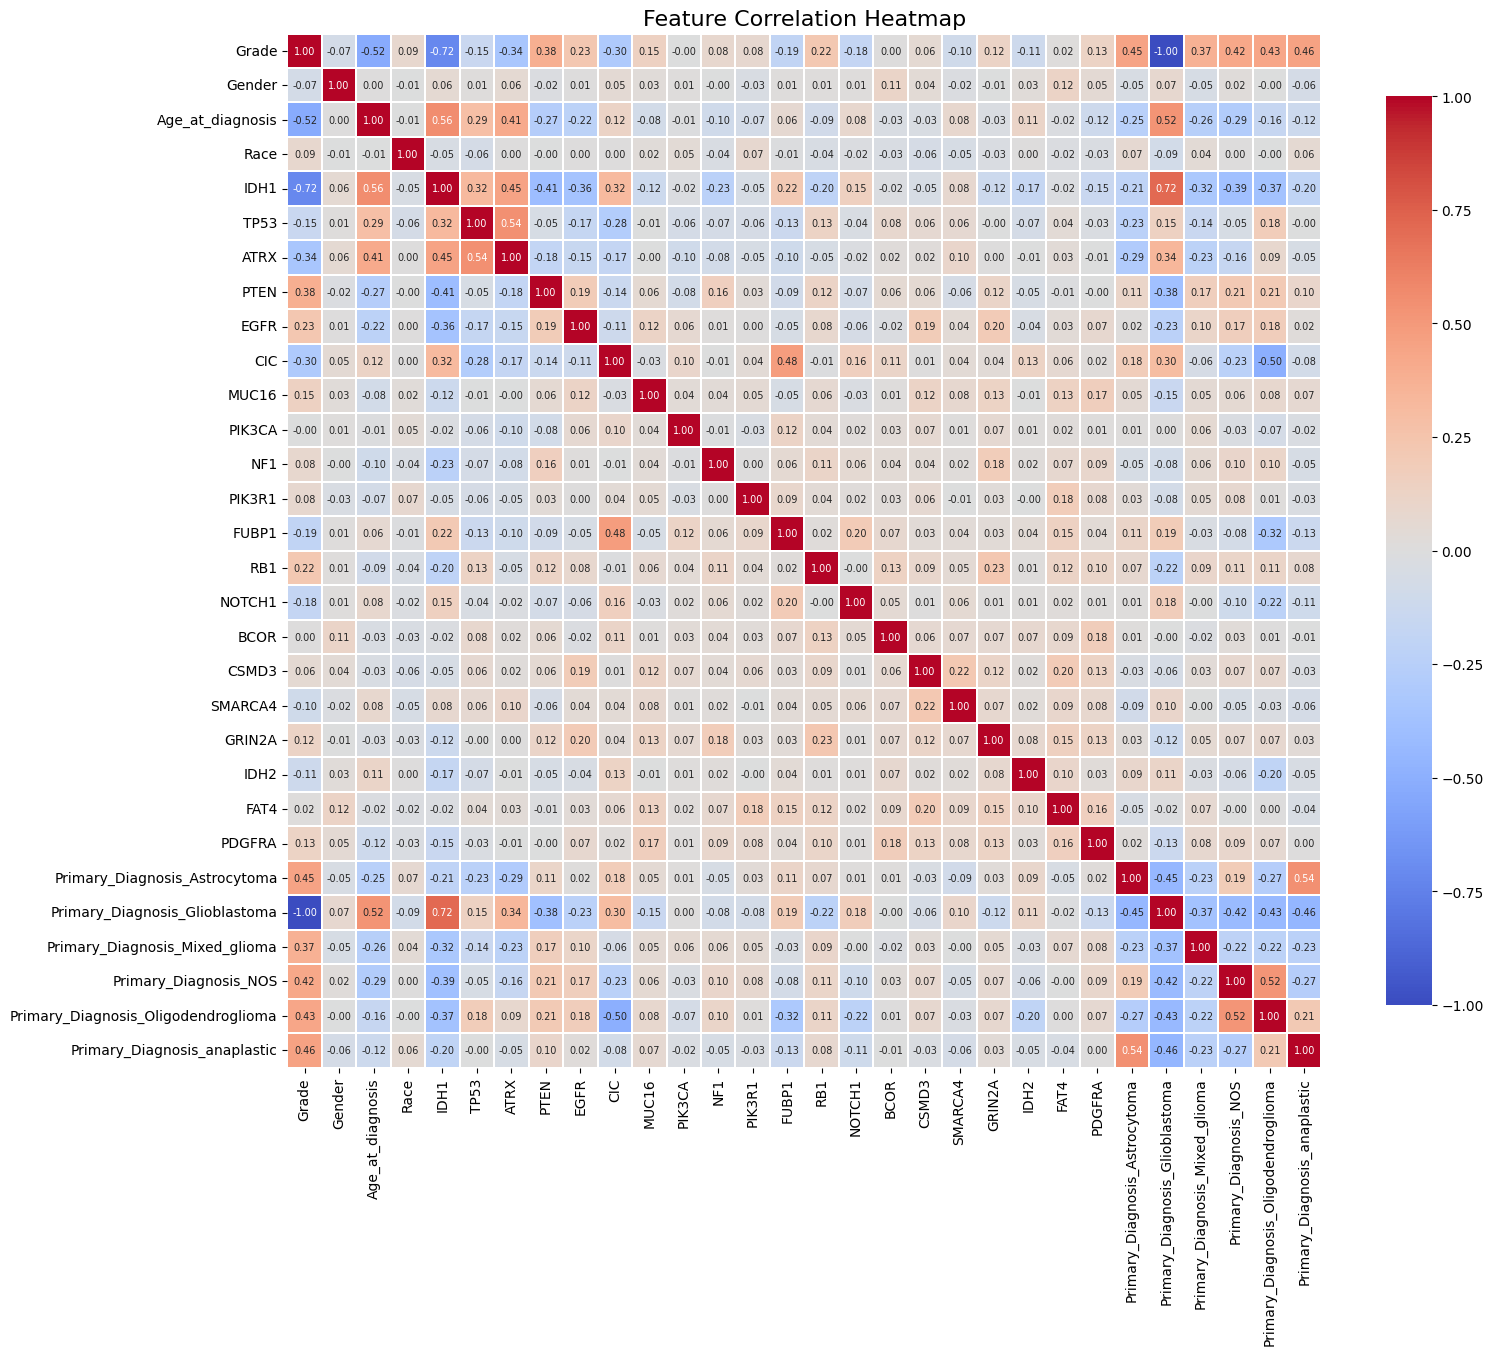

In [16]:
corr_matrix = processed_train_df.corr()
plt.figure(figsize=(16, 14))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.3,
    cbar_kws={"shrink": 0.8},
    xticklabels=True,
    yticklabels=True,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 7}
)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

1. **`Grade` and `Primary_Diagnosis_Glioblastoma`** \
    This is a perfect negative correlation: 
    - `Grade = 0 (GBM)` <-> `Primary_Diagnosis_Glioblastoma = 1`
    - `Grade = 1 (LGG)` <-> `Primary_Diagnosis_Glioblastoma = 0`

    It is quite expected to see correlation between actual and primary diagnisis, all `Primary_Diagnosis_*` factors are post-diagnosis descriptors, not independent predictors, so we can clearly interpret that as the label leakage, meaning that if we use those factors for classification, we can get linear dependency with such factors as `Primary_Diagnosis_Glioblastoma` in that particular case. Moreover if we 100% rely on medical conclusion, we can predict wrong diagnisis in case of primary diagnosis mistake. \
    Therefore, we'll try to remove all `Primary_Diagnosis_*` features to prevent label leakage and artificial performance inflation. This ensures that the model relies solely on independent clinical measurements and molecular characteristics available prior to final diagnosis.

2. **Strong Grade dependencies** \
    Strong correlation of `Grade` with `IDH1` (`IDH1` mutation strongly associated with `LGG`) - is biologically meaningful and exactly what we expect clinically.

3. **Moderate-strong Grade dependencies** \
    `Grade` correlates with `Age_at_diagnosis` which means that older patients most likely have `GBM` and younger ones `LGG`.
4. **Genes correlation** \
    We got moderate correlation between:
    - `IDH1` and `ATRX`
    - `IDH1` and `TP53`
    - `TP53` and `ATRX`
    - `CIC` and `FUBP1`
    - `IDH1` and `EGFR` (negative)
    - `IDH1` and `PTEN` (negative)
    That means that those pairs can carry overlapping information and may introduce redundancy and increase variance in the model. We can keep all of those features to not throw away any useful unformation, but use L1 regularization instead to let the model decide which ones actually matter.
5. **`Age` and `IDH1`** \
    The observed correlation suggests that age and `IDH1` jointly encode tumor biology, which may improve predictive performance when used together.

## Structural shift analysis

In [17]:
lgg_df = processed_train_df[processed_train_df["Grade"] == 1]
gbm_df = processed_train_df[processed_train_df["Grade"] == 0]

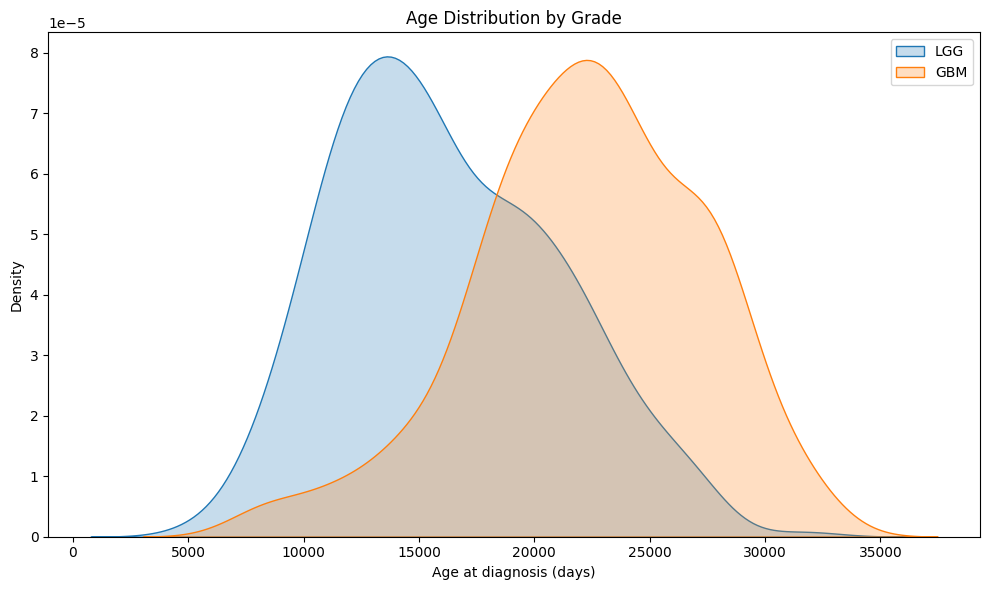

In [18]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    lgg_df["Age_at_diagnosis"],
    label="LGG",
    fill=True,
    common_norm=False
)

sns.kdeplot(
    gbm_df["Age_at_diagnosis"],
    label="GBM",
    fill=True,
    common_norm=False
)

plt.xlabel("Age at diagnosis (days)")
plt.ylabel("Density")
plt.title("Age Distribution by Grade")
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# Age is not guaranteed normal, so we avoid t-test
stat, p_value = mannwhitneyu(
    lgg_df["Age_at_diagnosis"],
    gbm_df["Age_at_diagnosis"],
    alternative="two-sided"
)

stat, p_value

(np.float64(16871.0), np.float64(2.362454585535582e-38))

- LGG -> clearly younger-centered distribution
- GBM -> clearly older-centered distribution
- There is overlap, but the centers and mass differ strongly

Age at diagnosis exhibits a pronounced and statistically significant structural shift between LGG and GBM populations, with GBM cases occurring at substantially older ages.

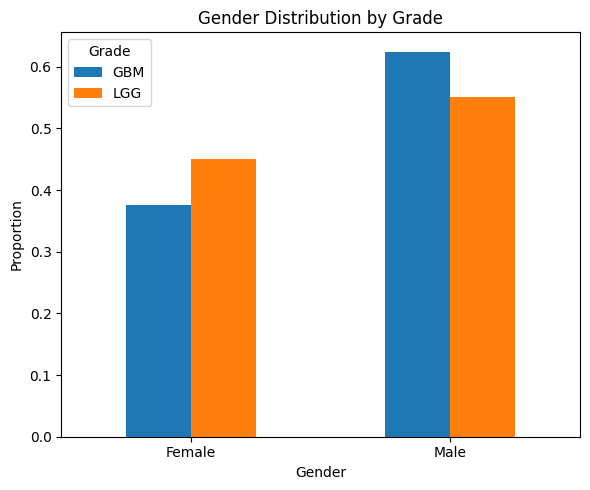

In [20]:
gender_labels = processed_train_df["Gender"].map(MAPPING_REVERSED["Gender"])
grade_labels = processed_train_df["Grade"].map(MAPPING_REVERSED["Grade"])

ct_gender = pd.crosstab(
    gender_labels,
    grade_labels,
    normalize="columns"
)

ct_gender.plot(kind="bar", figsize=(6, 5))
plt.title("Gender Distribution by Grade")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
contingency = pd.crosstab(
    processed_train_df["Gender"],
    processed_train_df["Grade"]
)

chi2, p_value, _, _ = chi2_contingency(contingency)
chi2, p_value

(np.float64(3.0340596069074937), np.float64(0.08153378134673887))

Female:
- GBM ~0.375
- LGG ~0.45

Male:
- GBM ~0.62
- LGG ~0.55

$\rho$~0.0815 > 0.05 - effect size is small, no statistically reliable structural shift in this dataset.

Gender distribution does not differ significantly between LGG and GBM groups and is unlikely to provide meaningful discriminative power.

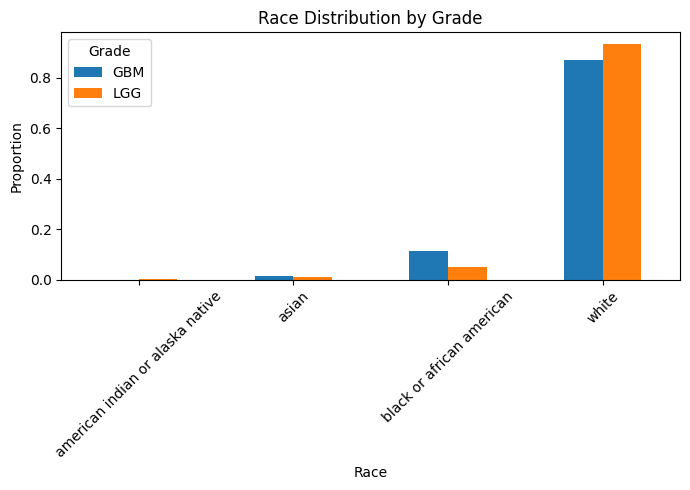

In [22]:
race_labels = processed_train_df["Race"].map(MAPPING_REVERSED["Race"])
grade_labels = processed_train_df["Grade"].map(MAPPING_REVERSED["Grade"])

ct_race = pd.crosstab(
    race_labels,
    grade_labels,
    normalize="columns"
)

ct_race.plot(kind="bar", figsize=(7, 5))
plt.title("Race Distribution by Grade")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
contingency = pd.crosstab(
    processed_train_df["Race"],
    processed_train_df["Grade"]
)

chi2, p_value, _, _ = chi2_contingency(contingency)
chi2, p_value

(np.float64(9.075032295190859), np.float64(0.02830974725178662))

At first glance $\rho$~0.028 -> "significant", but:

1. Very small category counts
- American Indian / Alaska Native ~ almost zero
- Asian ~ very small
- These violate chi-square assumptions (expected counts $\ge$ 5)

2. Highly imbalanced classes
- White >> all others
- Small absolute changes inflate chi-square

There is weak evidence of distributional differences in race composition across grades, driven primarily by class imbalance and small subgroup counts rather than a strong structural shift.

## Summary

Structural shift analysis of clinical features revealed a strong and statistically significant difference in age at diagnosis between LGG and GBM patients, with GBM cases skewed towards older ages.

Gender distributions did not differ significantly between the two groups.

Race showed weak evidence of distributional differences, however this effect is likely influenced by class imbalance and small subgroup sizes and is not expected to contribute substantially to predictive performance.


Also perform feature selection accordingly to the conclusions from above (prepare additional dataset for the following experiments):  

In [24]:
drop_list = diagnosis_cols
processed_train_df_cleaned = processed_train_df.drop(drop_list, axis=1)
processed_train_df_cleaned

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,1,29018,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,19542,3,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2,1,0,22570,3,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,0,21225,3,0,1,1,1,1,0,...,1,1,1,0,1,1,1,1,1,1
4,1,1,11063,3,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0,1,24455,3,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
598,1,0,10164,3,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
599,1,1,10617,3,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
600,1,1,18927,3,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Preparation of test data for inference

In [25]:
test_df = pd.read_csv("./data/test.csv")

print("Shape:", test_df.shape)
test_df

Shape: (259, 26)


,Unnamed: 0,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,TCGA-DU-A5TW,Female,33 years 54 days,"Astrocytoma, anaplastic",black or african american,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,1,TCGA-DU-7007,Male,33 years 192 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,2,TCGA-P5-A5EZ,Male,39 years 131 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,3,TCGA-02-0055,Female,62 years 153 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,4,TCGA-28-5218,Male,63 years 86 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,254,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
255,255,TCGA-E1-A7YY,Female,27 years 6 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
256,256,TCGA-HW-8320,Male,36 years 354 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
257,257,TCGA-14-0740,Male,70 years 60 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED


In [26]:
processed_test_df = drop_features(
    df=test_df,
    feature_names=["Unnamed: 0", "Case_ID"]
)
processed_test_df = fill_not_reported_field(
    df=processed_test_df,
    feature="Gender",
    mode="mode"
)
processed_test_df = fill_not_reported_field(
    df=processed_test_df,
    feature="Primary_Diagnosis",
    mode="mode"
)
processed_test_df = fill_not_reported_field(
    df=processed_test_df,
    feature="Race",
    mode="mode"
)
processed_test_df = convert_lifetime(
    df=processed_test_df,
    feature="Age_at_diagnosis"
)
processed_test_df = split_feature_components(
    df=processed_test_df,
    feature="Primary_Diagnosis"
)
processed_test_df = map_features(
    df=processed_test_df,
    feature_mapping=MAPPING
)

Feature 'Grade' not found in DataFrame. Skipping...
Mapping for feature 'Race' contains labels not present in data: {'american indian or alaska native'}


In [27]:
from preprocessing_scripts.custom_inputer import normalize_missing, fit_age_imputer, apply_age_imputer

age_imputer = fit_age_imputer(processed_train_df)

processed_test_df = normalize_missing(processed_test_df, features=["Gender", "Age_at_diagnosis", "Race"] + diagnosis_cols)
processed_test_df = apply_age_imputer(
    processed_test_df,
    age_imputer
)

In [35]:
# All is OK check
from preprocessing_scripts import MISSING_TOKENS

nan_mask = processed_test_df.isna()
missing_masks = [processed_test_df.astype(str) == str(token) for token in MISSING_TOKENS]
missing_mask = pd.concat(missing_masks, axis=1).any(axis=1)
missing_mask = nan_mask | missing_mask
missing_mask.sum()
processed_test_df[missing_mask.any(axis=1)]

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,GRIN2A,IDH2,FAT4,PDGFRA,Primary_Diagnosis_Astrocytoma,Primary_Diagnosis_Glioblastoma,Primary_Diagnosis_Mixed_glioma,Primary_Diagnosis_NOS,Primary_Diagnosis_Oligodendroglioma,Primary_Diagnosis_anaplastic


In [37]:
processed_test_df_cleaned = processed_test_df.drop(drop_list, axis=1)
processed_test_df_cleaned

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,12099.0,2,0,0,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
1,1,12237.0,3,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,14366.0,3,0,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
3,0,22783.0,3,1,0,1,0,1,1,1,...,1,0,1,1,1,1,1,1,0,1
4,1,23081.0,3,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,1,11502.0,3,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
255,0,9861.0,3,0,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
256,1,13494.0,3,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
257,1,25610.0,3,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,0
